### ডেটা ভিজ্যুয়ালাইজেশন
গিটহাব লিংক https://github.com/raqueeb/ml-python/blob/master/seaborn.ipynb

যেকোন মেশিন লার্নিং মডেল তৈরির আগে ডেটাকে হাতে নিয়ে দেখাটা একটা ভালো অভ্যেস। প্রথমতঃ ডাটার ভেতরে আমাদের উত্তরের ধারণাটা আছে কিনা সেটা জানলে আমাদের কষ্ট কমে যাবে। দ্বিতীয়তঃ এই সমস্যাটা আসলে মেশিন লার্নিং সমস্যা কি না সেটা জানলে আমাদের এই রাস্তায় হাটতে হয় না। একটা জিনিস দেখা গেছে - যখন আমরা আমাদের ডাটাকে দুটো (তিনটাও হতে পারে) এক্সিসে প্লট করি - তখন একটা মজার ব্যাপার ঘটে। মানুষ বুঝতে পারে ভেতরের ঘটনা।

পৃথিবী কিন্তু প্যাটার্নে ভর্তি। আশেপাশে তাকান। প্রাকৃতিক হাজারো জিনিসের প্যাটার্ন, গাছ, মাটির স্তর, সূর্যের আলো, পানির ঢেউ দেখলেই বোঝা যায় অনেক কিছু। ফিজিক্স, ম্যাথ তো প্যাটার্ন ভর্তি। এই প্যাটার্নের ভেতর থেকে অসামঞ্জস্যতা বা তার কিছুটা 'পিকিউলারিটিজ' বের করাতে ডেটা প্লট একটা দরকারী জিনিস। কেমন হয়, আমাদের কিছু আইরিস ডেটাকে মাপামাপি করা হয়েছিলো ইঞ্চিতে যেখানে সেটা হবার কথা সেন্টিমিটারে? সেটাও ধরা পড়বে এই ডেটা ভিজ্যুয়ালাইজেশনে। এটা ঠিক, আমাদের প্রতিদিনের কাজে এই ঝামেলা অনেকটাই কমন। 

এ ব্যাপারে আমাদের মাথা অসাধারণ ভালো। ডাটার প্লটিং থেকে প্যাটার্ন বের করতে ওস্তাদ। খালি চোখেই অনেক কমপ্লিকেটেড ছবি থেকে এর ভেতরের মেসেজ নিয়ে আসতে পারি আমরা। পাইথনে "ম্যাটপ্লটলিব" হচ্ছে ভিজ্যুয়ালাইজেশনের ডিফ্যাক্টো স্ট্যান্ডার্ড, তবে স্ট্যাটিসটিকাল ভিজ্যুয়ালাইজেশন টুল হিসেবে "সীবোর্ন" মাথা খারাপ করে দেবার মতো। এটা আসেও স্ট্যান্ডার্ড সব মেশিন লার্নিং প্যাকেজের সাথে। আর দেরি কেন?

In [1]:
%matplotlib inline 

In [2]:
import seaborn as sns

আইরিস ডেটাসেট এতোই জনপ্রিয় যে এর একটা ইনস্ট্যান্স দেয়া হয়েছে সিবোর্ণে। ব্যবহার করি sns.load_dataset('iris') মেথডকে। 

In [3]:
iris = sns.load_dataset('iris')

পৃথিবীর সবকিছুই আপেক্ষিক। একটার রেফারেন্সে আরেকটা আপেক্ষিক। ডেটা নিয়ে কাজ করতে গেলে প্রতিটা জিনিসের সাথে প্রতিটার একটা সম্পর্ক থাকে। আপনারা সামনে ডেটা নিয়ে কাজ করতে গেলে বুঝবেন কিভাবে সামান্য ‘কোরিলেশন’ একে অপরের সাথে জুড়ে আছে। সেটার হিটম্যাপ দেখি একটা। যেহেতু ডেটাসেট খুব বড় নয়, সেকারণে স্ট্যান্ডার্ড ‘কোরিলেশন’ কোএফিসিয়েন্ট বের করতে পারি প্রতিটা অ্যাট্রিবিউটের জোড়াদের সাথে। এটাকে আমরা বলি পিয়ারসন এর "আর"। সেকারণে corr() মেথড এর ব্যবহার। 

In [4]:
correlation = iris.corr()

In [5]:
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


একটা মজার জিনিস দেখছি এখানে। স্ট্যান্ডার্ড ‘কোরিলেশন’ কোএফিসিয়েন্ট সাধারণতঃ -১ থেকে ১ হয়। মানে লিনিয়ার কোরিলেশন হচ্ছে যখন একটা বাড়ে, তখন আরেকটা জিনিস সেভাবে বাড়ে বা কমে। যখন এটা ১ এর কাছাকাছি হয় তখন সেটাকে একটা শক্ত পজিটিভ কোরিলেশন হিসেবে ধরা হয়। এদিকে সেটা যদি -১ এর দিকে যায়, তখন সেটাকে আমরা শক্ত নেগেটিভ ‘কোরিলেশন’ বলি। আবার ০ এর কাছে হলে এটার কোন লিনিয়ার ‘কোরিলেশন’ নেই। petal_length এর সাথে petal_width এর সম্পর্ক 0.962865 মানে ১ এর কাছাকাছি।  sepal_length এর সাথে petal_length এর সম্পর্ক 0.871754 হলে শক্ত পজিটিভ কোরিলেশন আছে বলে ধরা হয়। বাকিদের সাথে অতো শক্ত পজিটিভ কোরিলেশন দেখছি না এমুহুর্তে। দেখি ছবি কি বলে? ঠিক ধরেছেন। একই জিনিস তবে খালি চোখে চট করে ধরা যায়। এজন্যই ভিজ্যুয়ালাইজেশন এতো জরুরি। ডান পাশের কালার ম্যাপ দেখে এক নজরেই কোরিলেশন বোঝা সম্ভব। 

(<matplotlib.axes._subplots.AxesSubplot at 0x2037a53c470>,)

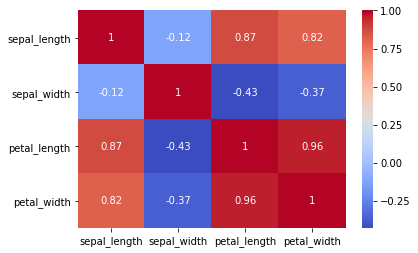

In [6]:
sns.heatmap(iris.corr(), cmap = 'coolwarm',  annot=True),

ডেটার ভেতরে কি আছে সেটা জানতে শুরুতেই দরকার ডেটা ভিজ্যুয়ালাইজেশন। ডেটাকে ভালোভাবে ভিজ্যুয়ালাইজ করতে একটা ভালো উপায় হচ্ছে স্ক্যাটার প্লট। একটা স্ক্যাটার প্লটে একেকটা এক্সিসে (মানে x এক্সিসে একটা ফিচার এবং y এক্সিসে আরেকটা ফিচার) ধরে সেটাকে বিন্দু ধরে প্লট করলে চমৎকার ধারণা পাওয়া যায়। এখন কম্পিউটার স্ক্রিন দুই ডাইমেশনের হওয়ায় আমাদেরকে সন্তুষ্ট থাকতে হয় একেকবারে দুই/তিনটা করে ফিচার প্লট করে। তবে সেটার 'ওয়ার্কঅ্যারাউন্ড' আছে একটা। 

এবার একটু আমাদের তিনটা প্রজাতির ডেটার প্লট দেখি। খালি চোখে। আপনার বোঝার জন্য একটু "বেস্ট ফিট লাইন" ড্র করাতে বুঝে গেলেন কিভাবে একেকটা প্রজাতি আলাদা। এর মানে মেশিন লার্নিং ছাড়া নতুন ডেটাকে প্রেডিক্ট করতে পারবেন সহজে। এই ছবি দেখে। এখানে শুধুমাত্র petal_length এবং sepal_length	ব্যবহার করা হয়েছে দুই ডাইমেনশনের ছবি হবার কারণে। 

In [7]:
sns.set(style="whitegrid", color_codes=True) # change style

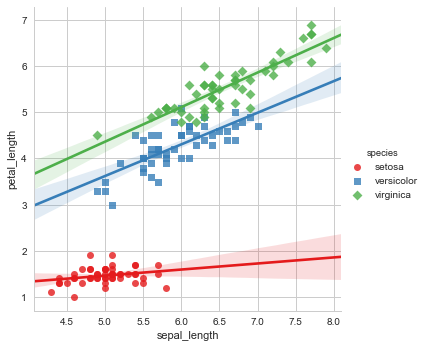

In [8]:
sns.lmplot(x="sepal_length", y="petal_length", hue="species", data = iris, \
              palette="Set1", markers=["o", "s", "D"])

একই জিনিস, "বেস্ট ফিট লাইন" ছাড়া। মার্কারগুলো একটু দেখুন ভালো করে। 

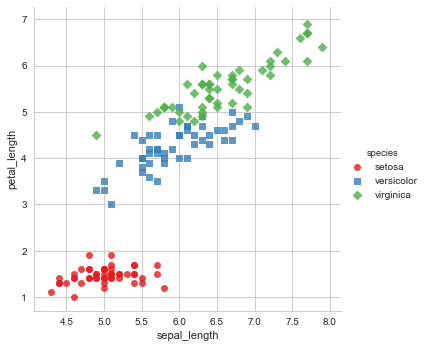

In [9]:
# sns.scatterplot(x = "sepal_length", y= "sepal_width", \
#       hue = "species", style = "species", data = iris)

#sns.lmplot(x="sepal_length", y="sepal_width", data=iris, hue="species", \
#           , legend=False)

sns.lmplot(x="sepal_length", y="petal_length", hue="species", data = iris, \
              palette="Set1", fit_reg=False, markers=["o", "s", "D"])

আরো ফিচার দেখতে চাইলে? 'ওয়ার্কঅ্যারাউন্ড' হচ্ছে "পেয়ার প্লট" যেটা সবগুলো ফিচার ধরে ধরে প্লট করে জয়েন্ট রিলেশনশিপ আর হিস্টোগ্রাম দেখায়। আমাদের ডেটাসেটে চারটা ফিচার মানে ৪ x 4 = ১৬টা পেয়ার প্লট হবার কথা। শুরুতে দুটো দিয়ে sepal_length এবং petal_length পাশাপাশি। একেকটা ফিচার দুদিক থেকে। "sepal_length", "petal_length" ফিচার দুটো দেখে কী মনে হচ্ছে? এগুলো বেশ ডিস্টিংক্ট। বিশেষ করে 'সেটোসা' প্রজাতি বেশ আলাদা। অন্যদের সাথে মেলা দুস্কর। 

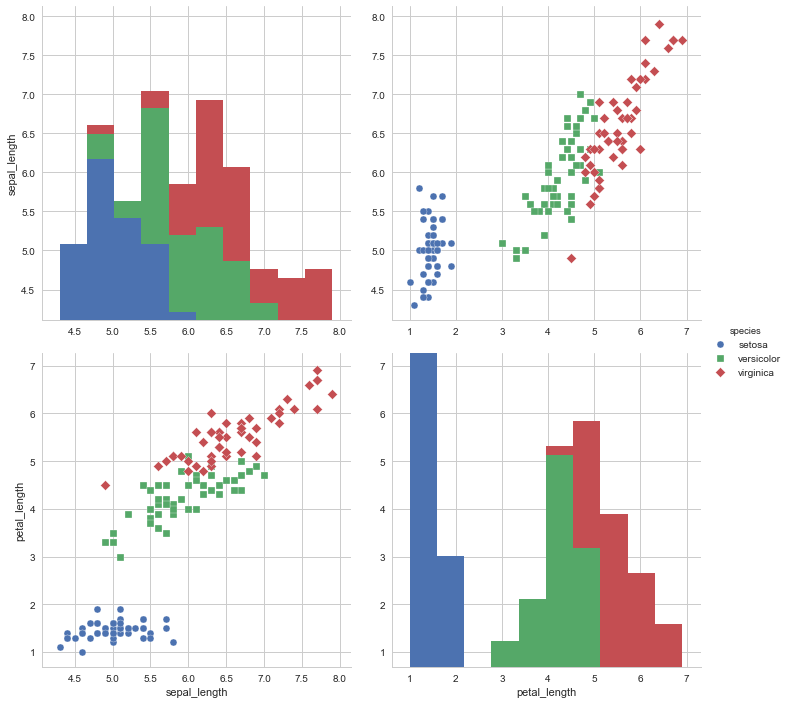

In [10]:
sns.pairplot(iris, size=5, vars=["sepal_length", "petal_length"], \
             markers=["o", "s", "D"], hue="species")

এখন আসি একদম ১৬টা পেয়ার প্লটে। একেকটার সাথে আরেকটার পেয়ার প্লটিং। ঘুরিয়ে ফিরিয়ে। সব পারমুটেশন কম্বিনেশন করে। একেকটা ফিচারের গোপন খবর বের হয়ে আসছে। কার সাথে কার সম্পর্ক ভালো অথবা খারাপ? দেখুন মিলিয়ে। কী? কিছু মিল পাচ্ছেন কোরিলেশন আর হিটম্যাপে?

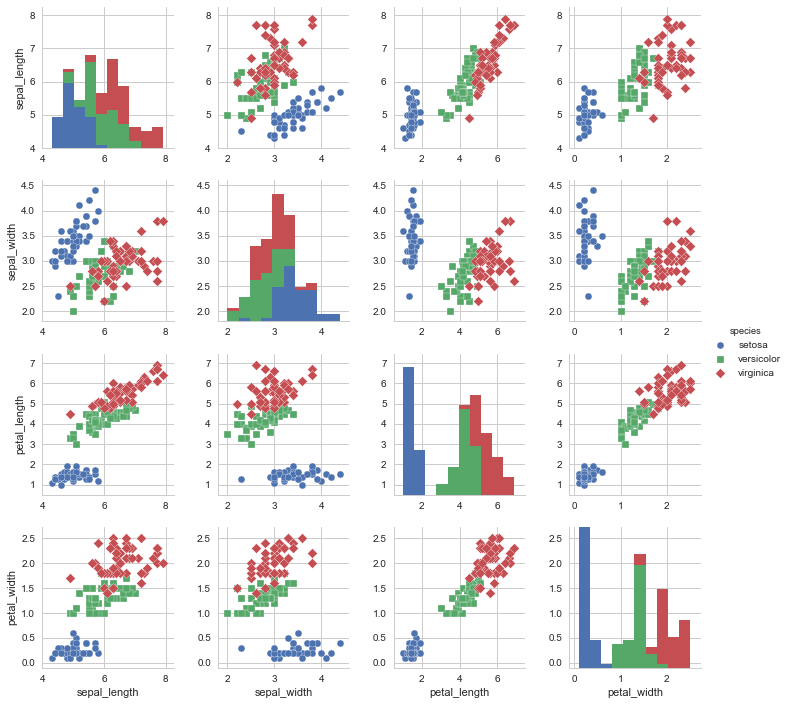

In [11]:
sns.pairplot(iris, markers=["o", "s", "D"], hue="species")

বেস্ট ফিট লাইনেও অনেককিছু বোঝা যায়। তবে এখন না বুঝলেও চলবে। 

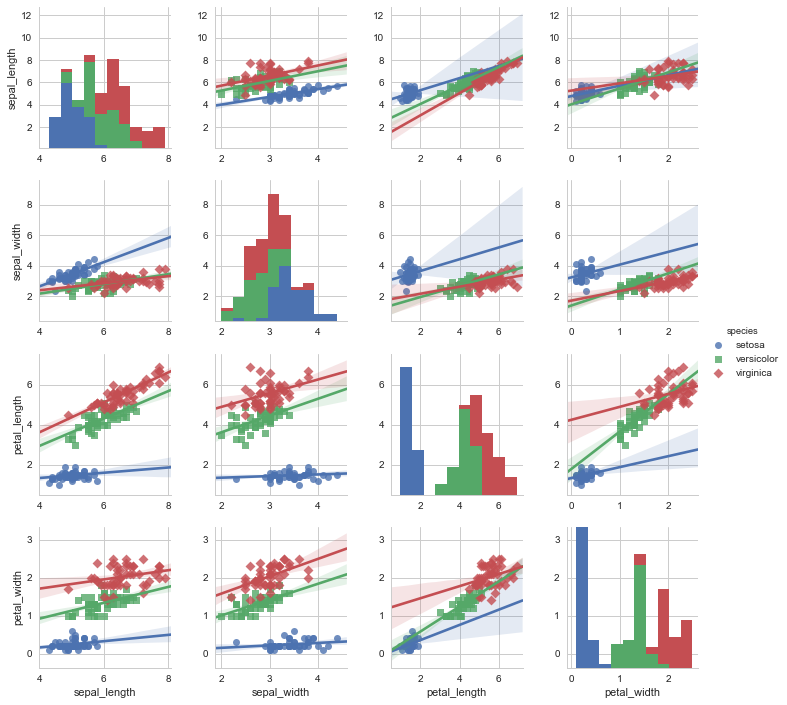

In [12]:
sns.pairplot(iris, kind="reg", hue="species", markers=["o", "s", "D"])

একটা বক্সপ্লট, চারটা ফিচার ধরে। 

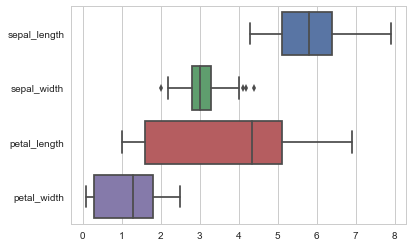

In [13]:
sns.boxplot(data = iris, orient = "h")

এই প্লট দেখলে ফিচারগুলোর অনুপাত নিয়ে একটা ধারণা হবে। 

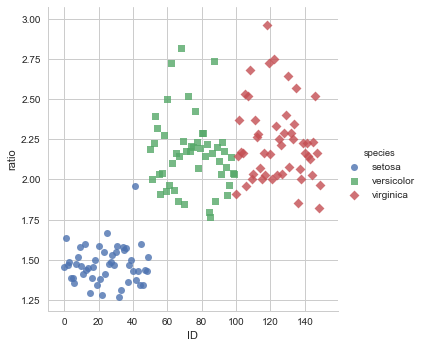

In [14]:
iris["ID"] = iris.index
iris["ratio"] = iris["sepal_length"]/iris["sepal_width"]
sns.lmplot(x="ID", y="ratio", data=iris, \
           hue="species", markers=["o", "s", "D"], fit_reg=False, legend=True)

স্ট্রিপ-প্লট

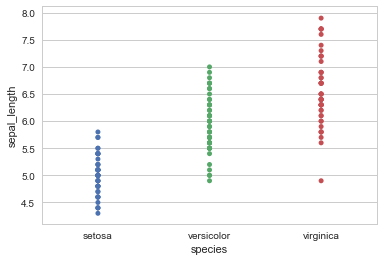

In [15]:
sns.stripplot(x = "species", y = "sepal_length", data = iris)

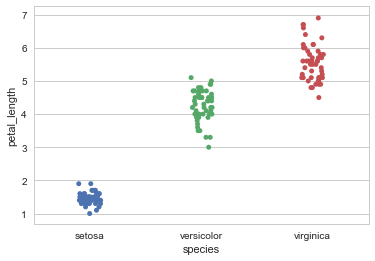

In [16]:
sns.stripplot(x = "species", y = "petal_length", data = iris, jitter = True)

সোয়ার্ম-প্লট

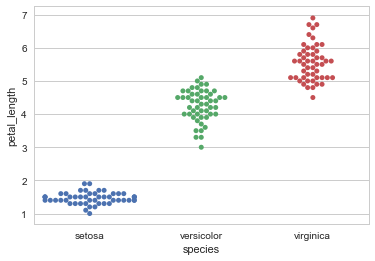

In [17]:
sns.swarmplot(x="species", y="petal_length", data=iris)